In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/datasets/항공 만족도/train.csv")
test = pd.read_csv("/content/drive/MyDrive/datasets/항공 만족도/test.csv")
pd.set_option('display.max_columns',None) # 요약 x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
passenger = pd.concat([train,test])

In [ ]:
passenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [ ]:
passenger.drop(labels=['Unnamed: 0', 'id'], axis=1, inplace=True)

In [ ]:
passenger['Arrival Delay in Minutes'].fillna(passenger['Arrival Delay in Minutes'].mean(axis = 0), inplace = True)

In [ ]:
def get_category(age):
  cat = int()
  if age <= 17: cat = 0
  elif age <= 65 : cat = 1
  elif age <= 79 : cat = 2
  else : cat = 3
  return cat

passenger['Age'] = passenger['Age'].apply(lambda x : get_category(x))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Gender 레이블 인코딩
encoderG = LabelEncoder()
encoderG.fit(passenger['Gender'])
passenger['Gender'] = encoderG.transform(passenger['Gender'])
print(encoderG.classes_)

# Customer Type 레이블 인코딩
encoderCT = LabelEncoder()
encoderCT.fit(passenger['Customer Type'])
passenger['Customer Type'] = encoderCT.transform(passenger['Customer Type'])
print(encoderCT.classes_)

# Type of Travel 레이블 인코딩
encoderTT = LabelEncoder()
encoderTT.fit(passenger['Type of Travel'])
passenger['Type of Travel'] = encoderTT.transform(passenger['Type of Travel'])
print(encoderTT.classes_)

# Class 레이블 인코딩
encoderC = LabelEncoder()
encoderC.fit(passenger['Class'])
passenger['Class'] = encoderC.transform(passenger['Class'])
print(encoderC.classes_)

# satisfaction 레이블 인코딩
encoderS = LabelEncoder()
encoderS.fit(passenger['satisfaction'])
passenger['satisfaction'] = encoderS.transform(passenger['satisfaction'])
print(encoderS.classes_)

['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Business' 'Eco' 'Eco Plus']
['neutral or dissatisfied' 'satisfied']


In [ ]:
# 9. Flight Distance 스케일링
passenger['Flight Distance'] = (passenger['Flight Distance'] - passenger['Flight Distance'].min()) / (passenger['Flight Distance'].max() - passenger['Flight Distance'].min())

# 10. Departure Delay in Minutes 스케일링
passenger['Departure Delay in Minutes'] = (passenger['Departure Delay in Minutes'] - passenger['Departure Delay in Minutes'].min()) / (passenger['Departure Delay in Minutes'].max() - passenger['Departure Delay in Minutes'].min())

# 11. Arrival Delay in Minutes 스케일링
passenger['Arrival Delay in Minutes'] = (passenger['Arrival Delay in Minutes'] - passenger['Arrival Delay in Minutes'].min()) / (passenger['Arrival Delay in Minutes'].max() - passenger['Arrival Delay in Minutes'].min())

In [ ]:
passenger = passenger.drop('Arrival Delay in Minutes', axis = 1)

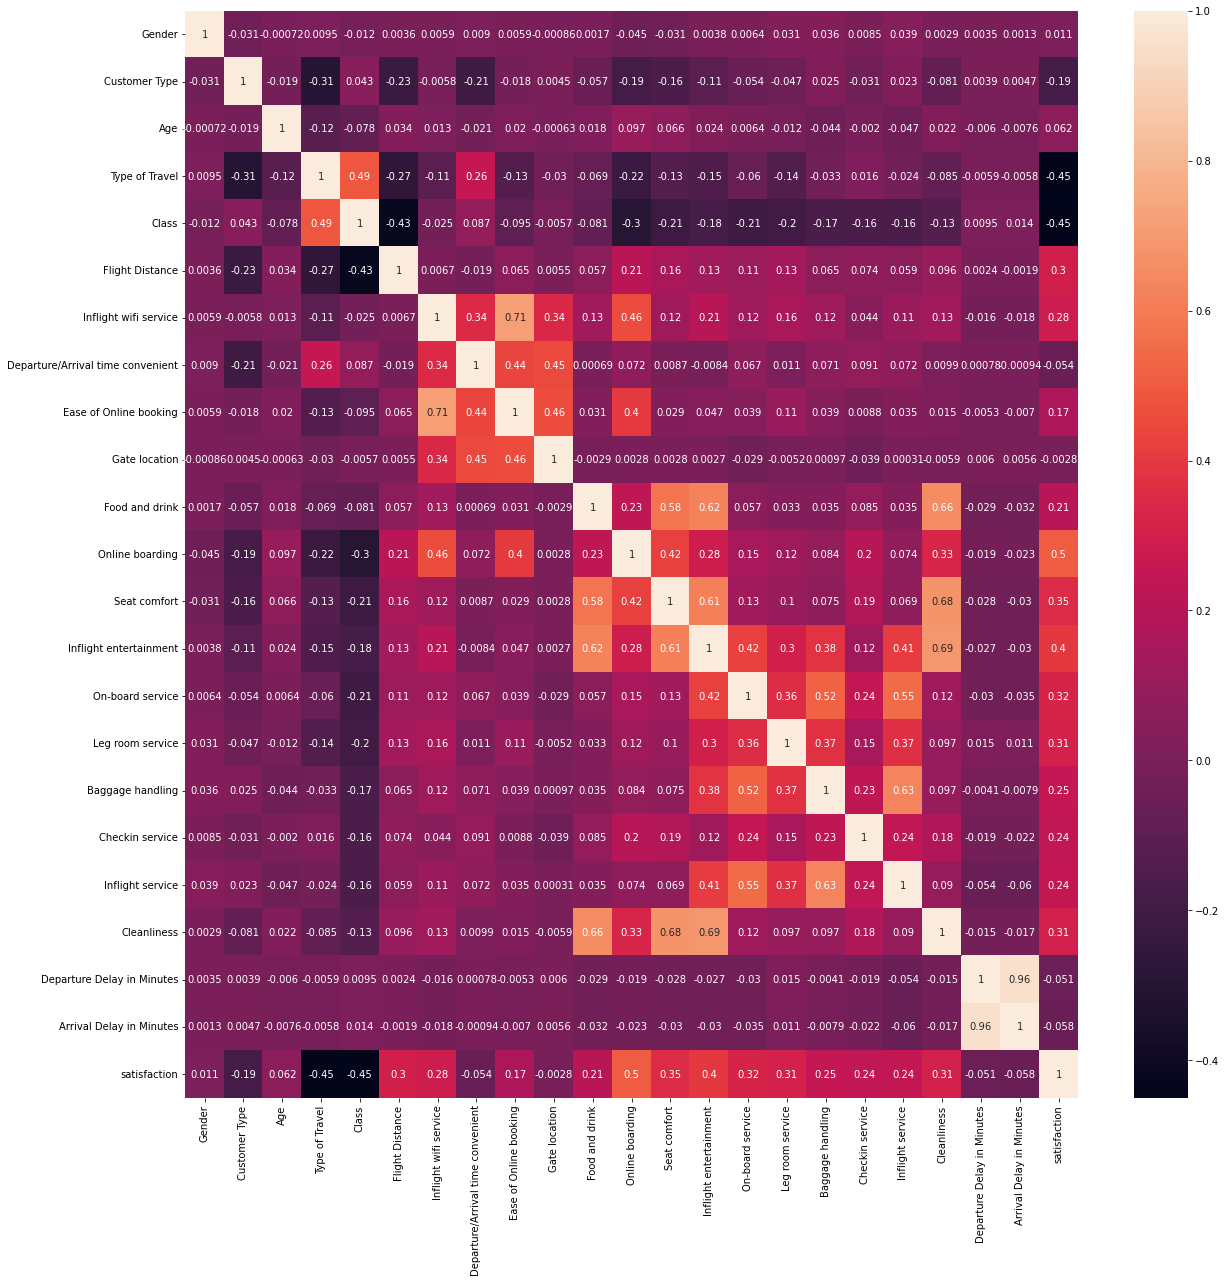

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(passenger.corr(),annot= True)

In [ ]:
from sklearn.model_selection import train_test_split
X = passenger.drop(['satisfaction'], axis = 1)
y = passenger['satisfaction']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state = 49)

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 158 kB/s 


In [ ]:
models = pd.DataFrame(columns = ['Model Name','Accuracy Score'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

In [ ]:
model_list = [('Random Forest Classifier', RandomForestClassifier(random_state = 49)),
              ('XGBoost Classifier',XGBClassifier(random_state = 49)),
              ('LightGBM',LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False))]

In [ ]:
for name, clf in model_list:
  clf.fit(X_train, Y_train)
  pred = clf.predict(X_test)
  score = accuracy_score(Y_test, pred)
  print(name)
  print(F'Accuracy:',accuracy_score(Y_test, clf.predict(X_test)))
  print(F'Precision:', precision_score(Y_test, clf.predict(X_test)))
  print(F'Recall:', recall_score(Y_test, clf.predict(X_test)))
  print(F'F1 Score:', f1_score(Y_test, clf.predict(X_test)))

  #Check Roc Auc Score
  print( F'Roc Auc Score:',roc_auc_score(Y_test, clf.predict(X_test)) )
  print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, clf.predict(X_test)) ) 
  print( F'Confusion Matrix:',confusion_matrix(Y_test, clf.predict(X_test)) )
  print('-------------------------------------------------------------------------------')
  new_row = {'Model Name':name, 'Accuracy Score':score}
  models = models.append(new_row,ignore_index = True)

Random Forest Classifier
Accuracy: 0.9604763371317113
Precision: 0.9698710505408543
Recall: 0.9381095938996276
F1 Score: 0.9537259615384615
Roc Auc Score: 0.957874137449655
Balanced Accuracy Score: 0.9578741374496551
Confusion Matrix: [[21554   493]
 [ 1047 15870]]
-------------------------------------------------------------------------------
XGBoost Classifier
Accuracy: 0.9402268760907504
Precision: 0.9456800684345594
Recall: 0.9148785245610924
F1 Score: 0.9300243367484902
Roc Auc Score: 0.9372777890642356
Balanced Accuracy Score: 0.9372777890642356
Confusion Matrix: [[21158   889]
 [ 1440 15477]]
-------------------------------------------------------------------------------
LightGBM
Accuracy: 0.9605789959963043
Precision: 0.9674791805969242
Recall: 0.9408287521428149
F1 Score: 0.9539678734116519
Roc Auc Score: 0.9582812060255962
Balanced Accuracy Score: 0.9582812060255963
Confusion Matrix: [[21512   535]
 [ 1001 15916]]
--------------------------------------------------------------

In [ ]:
models.sort_values(by = 'Accuracy Score', ascending = False)

,Model Name,Accuracy Score
2,LightGBM,0.960579
0,Random Forest Classifier,0.960476
1,XGBoost Classifier,0.940227


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score

0:	learn: 0.5646396	total: 56ms	remaining: 27.9s
1:	learn: 0.4491696	total: 113ms	remaining: 28s
2:	learn: 0.3853004	total: 149ms	remaining: 24.7s
3:	learn: 0.3217392	total: 243ms	remaining: 30.2s
4:	learn: 0.2938804	total: 328ms	remaining: 32.5s
5:	learn: 0.2590625	total: 401ms	remaining: 33s
6:	learn: 0.2412579	total: 481ms	remaining: 33.9s
7:	learn: 0.2292638	total: 517ms	remaining: 31.8s
8:	learn: 0.2182166	total: 551ms	remaining: 30s
9:	learn: 0.2057356	total: 597ms	remaining: 29.3s
10:	learn: 0.1992493	total: 642ms	remaining: 28.5s
11:	learn: 0.1900377	total: 692ms	remaining: 28.1s
12:	learn: 0.1851587	total: 756ms	remaining: 28.3s
13:	learn: 0.1787445	total: 806ms	remaining: 28s
14:	learn: 0.1689178	total: 853ms	remaining: 27.6s
15:	learn: 0.1652691	total: 901ms	remaining: 27.3s
16:	learn: 0.1608000	total: 954ms	remaining: 27.1s
17:	learn: 0.1579984	total: 999ms	remaining: 26.7s
18:	learn: 0.1552562	total: 1.06s	remaining: 26.9s
19:	learn: 0.1517058	total: 1.12s	remaining: 26.9s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

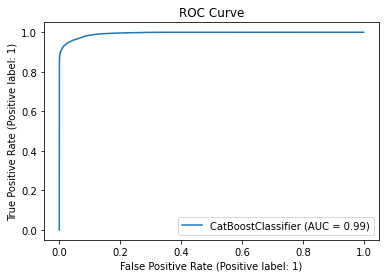

In [ ]:
#Using CatBoostClassifier method of ensemble class to use CatBoostClassification algorithm
from catboost import CatBoostClassifier
CatBoost = CatBoostClassifier(iterations=500,random_state=42,learning_rate=0.1)
print(CatBoost.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', CatBoost.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, CatBoost.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, CatBoost.predict(X_test)))
print(F'Precision:', precision_score(Y_test, CatBoost.predict(X_test)))
print(F'Recall:', recall_score(Y_test, CatBoost.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, CatBoost.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, CatBoost.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, CatBoost.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, CatBoost.predict(X_test)) )
print()#Print a new line

# ROC CURVE
plot_roc_curve(CatBoost, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r—')
plt.show()

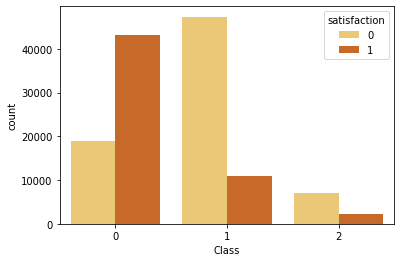

In [ ]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = passenger)
plt.show()

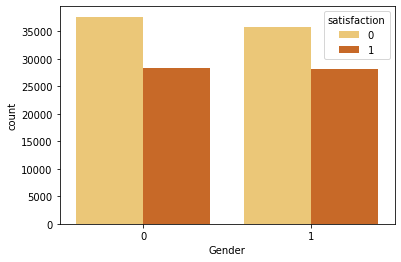

In [ ]:
sns.countplot(x = 'Gender', hue = 'satisfaction', palette = "YlOrBr", data = passenger)
plt.show()

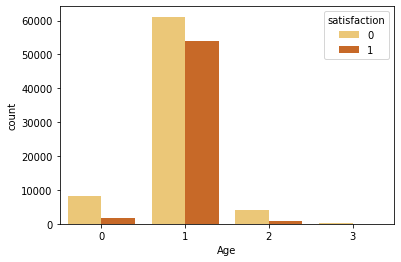

In [ ]:
sns.countplot(x = 'Age', hue = 'satisfaction', palette = "YlOrBr", data = passenger)
plt.show()

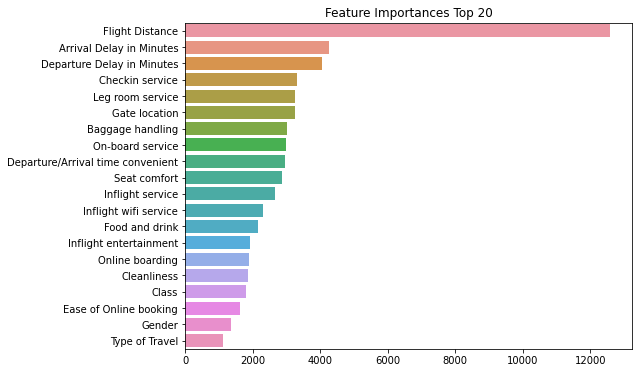

In [ ]:
import seaborn as sns

ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()